In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [55]:
df = pd.read_excel("F:\DCS-SEM 5\HR Lab\Ex 11.xlsx" , sheet_name = "Data")
df.head()

,Id,Name,Age,Position,Channel,Cost Involved,Induction Cost,Traget Given,Traget achived,Performance Differential,Performance rating,Type of training,Hours of training,Satisfication score,Time to fill
0,1,Emily Smith,32,Manager,2,12000,7000,12,11,1,High Performer,1,14,6,7
1,2,Liam Johnson,27,Analyst,3,11000,8000,15,12,3,Low Performer,2,13,10,4
2,3,Olivia Brown,38,Employee,3,11000,8000,13,12,1,High Performer,2,17,5,5
3,4,Noah Davis,36,Supervisor,3,11000,8000,13,10,3,Low Performer,1,13,9,6
4,5,Ava Wilson,32,Analyst,4,10000,9000,15,14,1,High Performer,2,13,5,4


In [56]:
df.columns

Index(['Id', 'Name', 'Age', 'Position', 'Channel', 'Cost Involved',
       'Induction Cost', 'Traget Given', 'Traget achived',
       'Performance Differential', 'Performance rating', 'Type of training',
       'Hours of training', 'Satisfication score', 'Time to fill'],
      dtype='object')

In [57]:
df.dtypes

Id                           int64
Name                        object
Age                          int64
Position                    object
Channel                      int64
Cost Involved                int64
Induction Cost               int64
Traget Given                 int64
Traget achived               int64
Performance Differential     int64
Performance rating          object
Type of training             int64
Hours of training            int64
Satisfication score          int64
Time to fill                 int64
dtype: object

In [58]:
df.describe()

,Id,Age,Channel,Cost Involved,Induction Cost,Traget Given,Traget achived,Performance Differential,Type of training,Hours of training,Satisfication score,Time to fill
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,75.500000,32.573333,2.573333,9586.666667,7573.333333,12.51000,10.463333,2.046667,1.533333,14.486667,7.566667,5.073333
std,43.372656,3.599232,1.108476,2606.107226,1108.475507,1.67309,1.851147,0.816524,0.499721,1.779620,1.697595,1.364121
min,1.000000,27.000000,1.000000,5000.000000,6000.000000,10.00000,7.000000,1.000000,1.000000,12.000000,5.000000,3.000000
25%,38.000000,30.000000,2.000000,10000.000000,7000.000000,11.00000,9.000000,1.000000,1.000000,13.000000,6.000000,4.000000
50%,75.500000,32.000000,3.000000,11000.000000,8000.000000,13.00000,11.000000,2.000000,2.000000,14.500000,8.000000,5.000000
75%,113.000000,36.000000,4.000000,11000.000000,9000.000000,14.00000,12.000000,3.000000,2.000000,16.000000,9.000000,6.000000
max,150.000000,38.000000,4.000000,12000.000000,9000.000000,15.00000,14.000000,3.000000,2.000000,17.000000,10.000000,7.000000


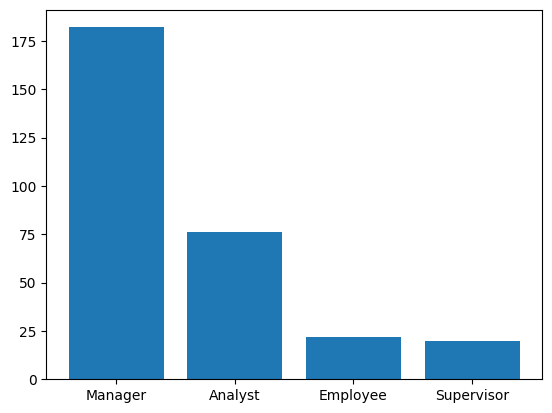

In [59]:
plt.bar(df['Position'].unique() , df['Position'].value_counts())
plt.show()

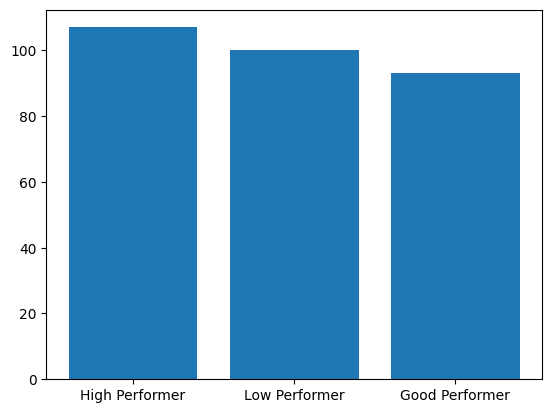

In [60]:
plt.bar(df['Performance rating'].unique() , df['Performance rating'].value_counts())
plt.show()

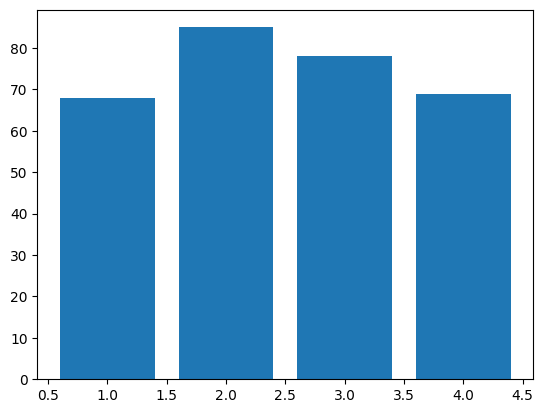

In [61]:
plt.bar(df['Channel'].unique() , df['Channel'].value_counts())
plt.show()

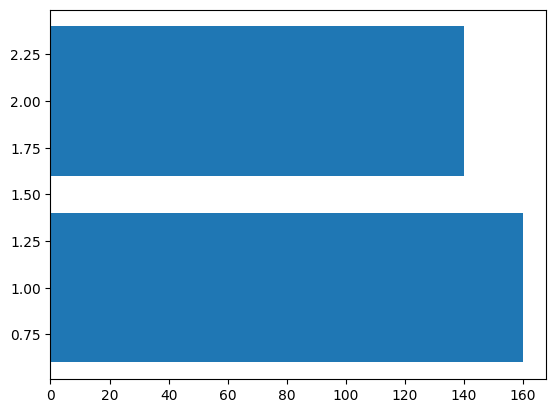

In [62]:
plt.barh(df['Type of training'].unique() , df['Type of training'].value_counts())
plt.show()


In [63]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Performance rating'] = encoder.fit_transform(df['Performance rating'])
df['Position'] = encoder.fit_transform(df['Position'])
df.head()

,Id,Name,Age,Position,Channel,Cost Involved,Induction Cost,Traget Given,Traget achived,Performance Differential,Performance rating,Type of training,Hours of training,Satisfication score,Time to fill
0,1,Emily Smith,32,2,2,12000,7000,12,11,1,1,1,14,6,7
1,2,Liam Johnson,27,0,3,11000,8000,15,12,3,2,2,13,10,4
2,3,Olivia Brown,38,1,3,11000,8000,13,12,1,1,2,17,5,5
3,4,Noah Davis,36,3,3,11000,8000,13,10,3,2,1,13,9,6
4,5,Ava Wilson,32,0,4,10000,9000,15,14,1,1,2,13,5,4


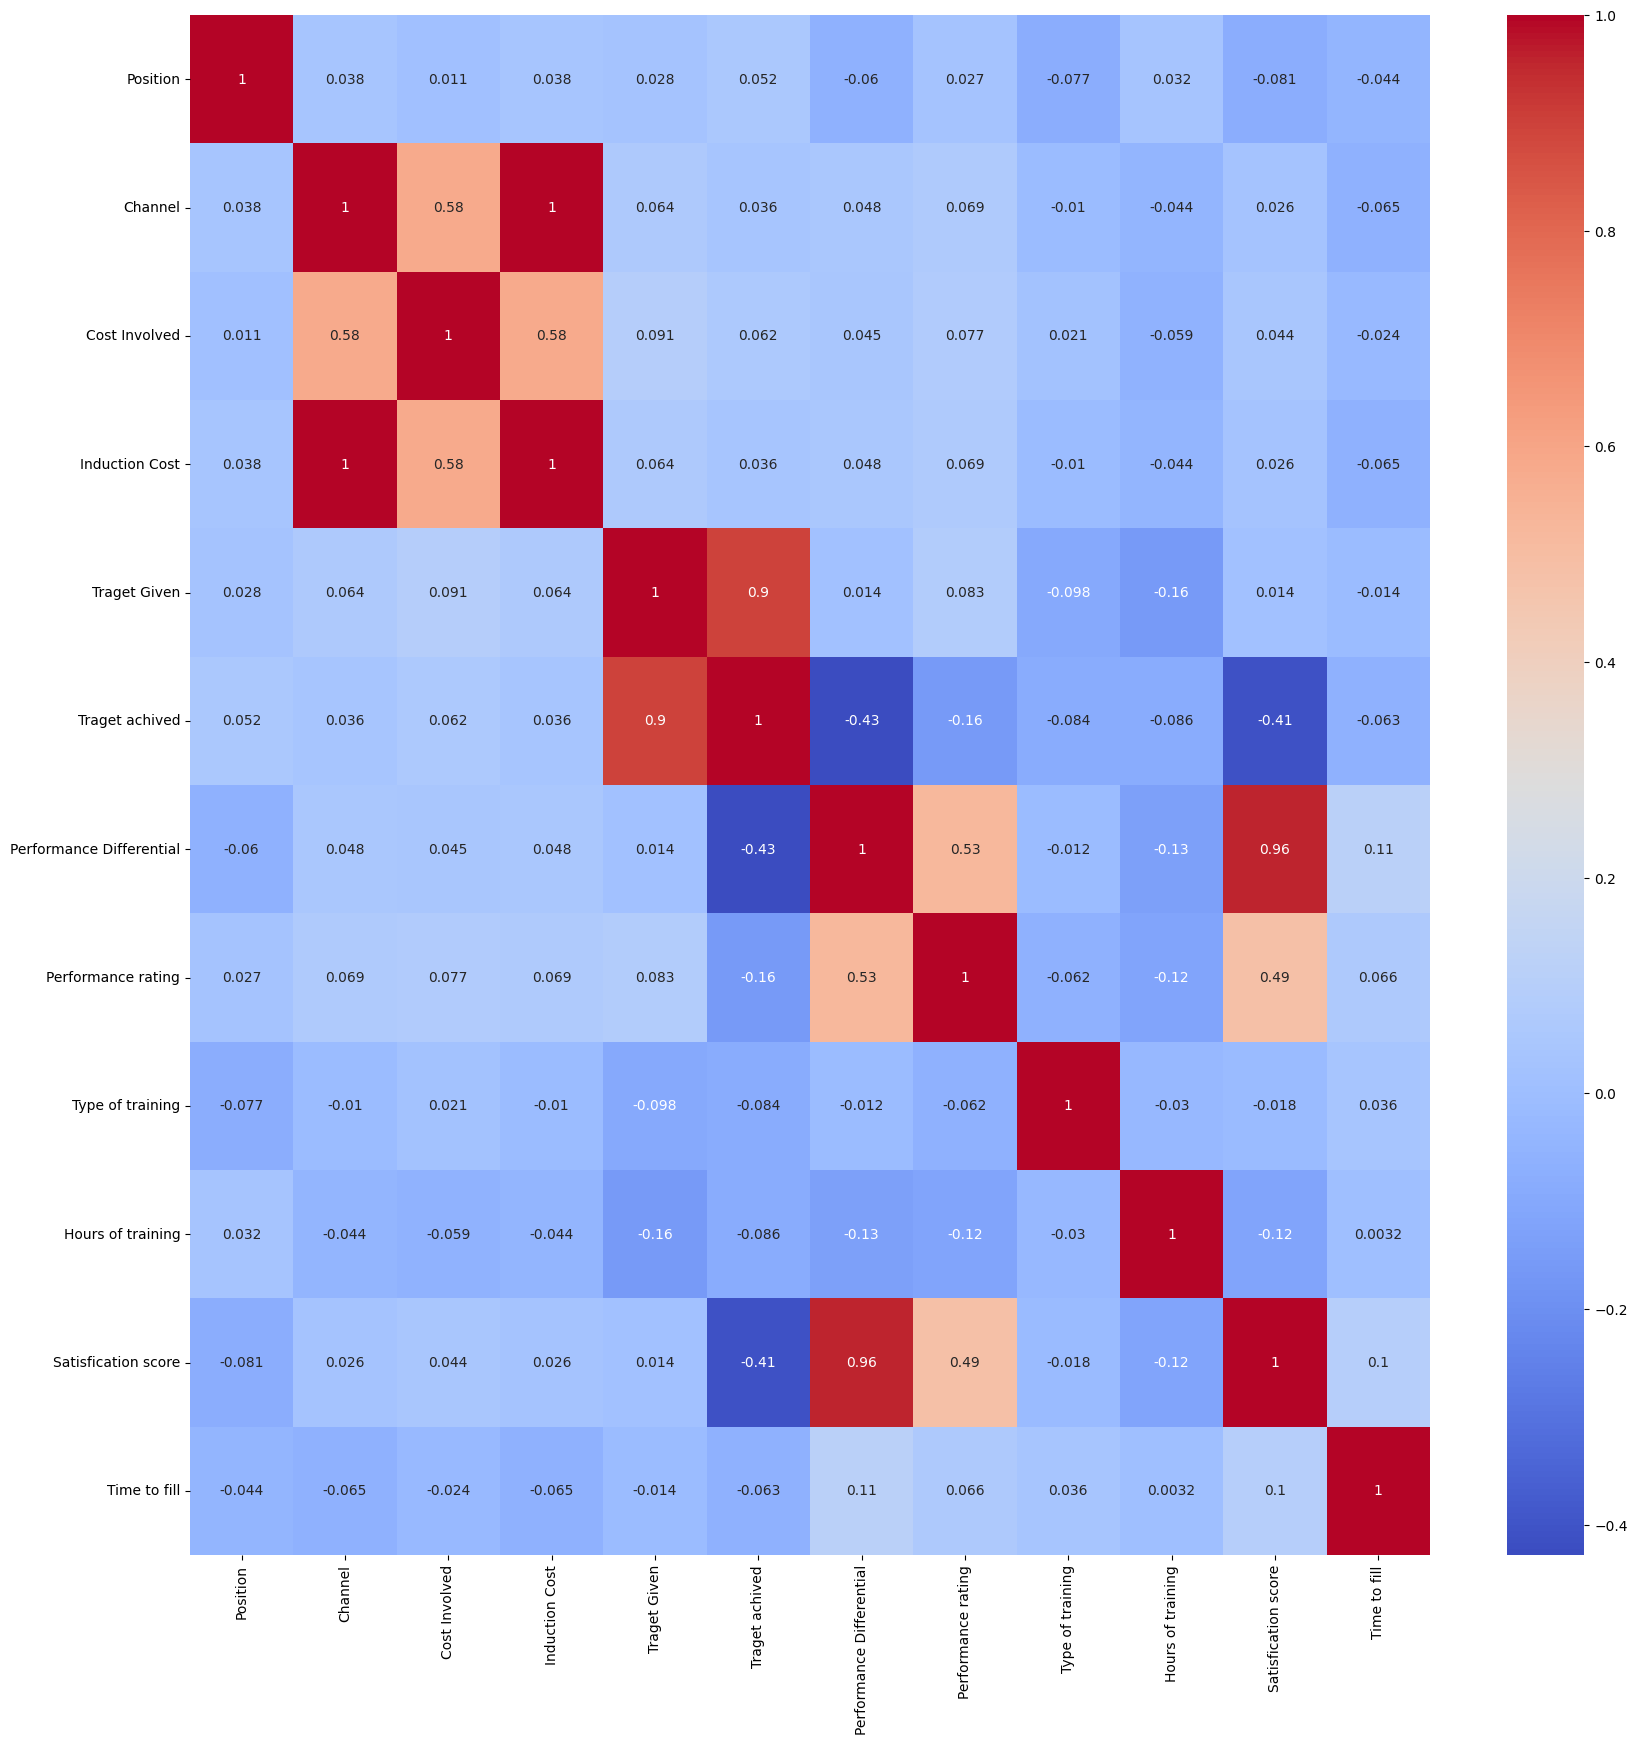

In [64]:
corr = df.drop(['Id' , 'Name' , 'Age'] , axis = 1).corr()
plt.figure(figsize = (20 , 20))
sns.heatmap(corr , annot = True , cmap = 'coolwarm')
plt.show()

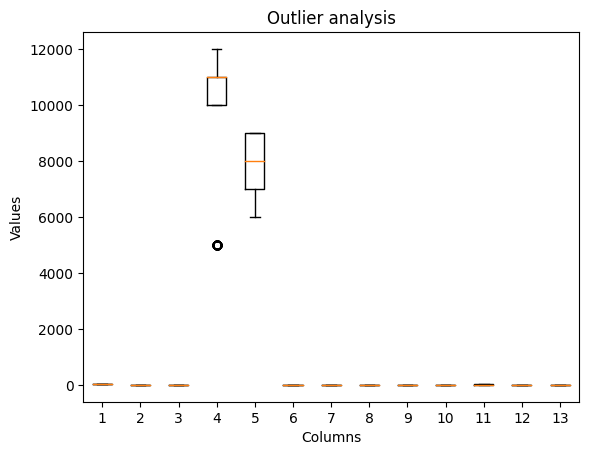

In [65]:
plt.boxplot(df.drop(['Id' , 'Name'] , axis = 1))
plt.title('Outlier analysis')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

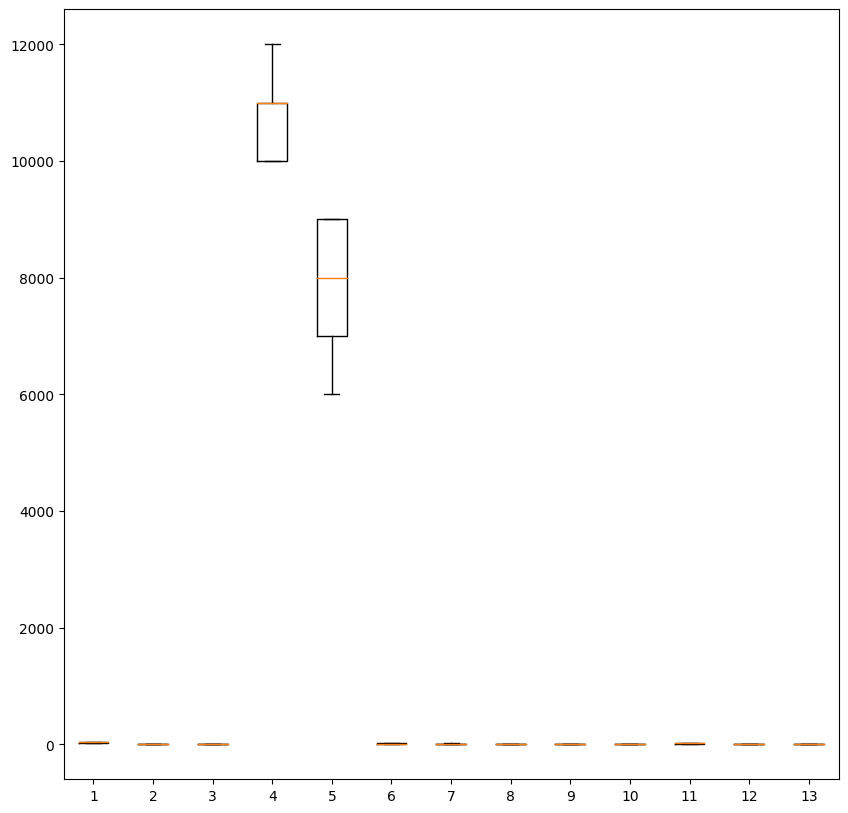

In [78]:
df.head()
train = df.drop(['Id' , 'Name'] , axis = 1)
from sklearn.impute import SimpleImputer
train = df.drop(['Id' , 'Name' ] , axis = 1)
def impute_outliers(data, column, factor):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr
    
    data_copy = data.copy()
    data_copy[column] = np.where(data_copy[column] < lower_bound, np.nan, data_copy[column])
    data_copy[column] = np.where(data_copy[column] > upper_bound, np.nan, data_copy[column])
    
    imputer = SimpleImputer(strategy="mean")
    data_imputed = imputer.fit_transform(data_copy)
    
    return pd.DataFrame(data_imputed, columns=data.columns)

for column in train.columns:
    train = impute_outliers(train,(column), 1.5)

plt.figure(figsize = (10 , 10))
plt.boxplot(train)
plt.show()

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

scaler = StandardScaler()
train = df[['Channel' , 'Cost Involved' , 'Induction Cost' , 'Performance Differential']]
Y = df['Performance rating']
X = scaler.fit_transform(train)

X_train, X_test  , Y_train , y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train , Y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_pred , y_test))
print(confusion_matrix(y_pred , y_test))
print(classification_report(y_pred , y_test))

1.0
[[18  0  0]
 [ 0 21  0]
 [ 0  0 21]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        21
         2.0       1.00      1.00      1.00        21

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [ ]:
dd